#Dataset for class project:

For accomodation prices: I found a website with airbnb prices for different cities/countries: https://insideairbnb.com/get-the-data/. I'm thinking to do New Zealand (on my bucket list), Hawaii, or Bangkok (one of my favorite cities I've been to in SEA).


For AQI prediction: https://www.kaggle.com/datasets/mexwell/world-air-quality

# Lab 2 - Exploratory Statistics

This lab will analyze a dataset detailing home sales. It will explore various aspects of the data, such as sale prices, asking prices, property sizes, and additional features like the number of bedrooms, bathrooms, sqft, and whether or not it has a view. Through statistics, distribution analysis, and coorelation studies, it will reveal insights into the housing market.

# Import libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive #mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import data

In [ ]:
path_data = "/content/drive/MyDrive/CS 356/homes.csv" # path to the data on my drive
data = pd.read_csv(path_data, header=1) # read the csv file
pd.set_option('display.max_columns', None) #ensures all columns are printed
print(data)
print(data.info()) #prints summary of the dataframe


     zipcode district  sqft  numbedrooms  numbathrooms  floors   view  \
0      95141     west  1373            7           1.0       3  False   
1      91312    south  3261            6           2.0       2  False   
2      94555    north  1835            3           3.0       3   True   
3      95141     east  2833            6           2.5       2   True   
4      96334    south  2742            6           2.5       2  False   
..       ...      ...   ...          ...           ...     ...    ...   
143    95141    north  2236            1           1.0       2  False   
144    95141    south  2061            7           3.0       1  False   
145    98755    south  3561            3           2.5       3   True   
146    94555     east  2143            3           1.0       2  False   
147    96334    north  3840            7           1.0       1  False   

     saleprice  askingprice  
0          695          698  
1          902          906  
2          888          892  
3  

# About data


The homes dataset has 149 entries, each corresponding to a unique property listing. There are no missing values in the dataset. The dataset features the following columns:

Zipocode: Catergorical, represents postal code of address. It is an integer

District: Catergorical, denotes the district where the property is located. It is a string.

sqft: Numerical, the total square footage of the property. It is an integer.

numbedrooms: Numerical, the number of bedrooms in the property. It is an integer.

numbathrooms: Numerical, the number of bathrooms in the property. Has decimal points, which accounts for half-bathrooms (i.e. without a shower)

floors: Numerical, the total number of floors in the poroperty. It is an integer.

view: Categorical, represented as a boolean indicating whether or not the property has a view

saleprice: Numerical, the sale price of the property. It is an integer. (Why isn't it a float???). Based on the zip codes (which are in the bay area), I'm going to assume the prices are in the hundreds of thousands - millions.

askingprice: Numerical, the initial asking price of the property. It is an integer.

# Summary Statistics


## What is the average sale price and asking price?

In [ ]:
# Calculate the average sale price
average_sale_price = data['saleprice'].mean()

# Calculate the average asking price
average_asking_price = data['askingprice'].mean()
price_difference = average_asking_price - average_sale_price

# Print the results
print(f"Average Sale Price: ${average_sale_price:,.2f}k")
print(f"Average Asking Price: ${average_asking_price:,.2f}k")
print(f"On average, properties sell for {price_difference:,.2f}k less than their asking price.")


Average Sale Price: $836.65k
Average Asking Price: $840.50k
On average, properties sell for 3.85k less than their asking price.


##What is the median square footage of the properties?

In [ ]:
# Calculate the median sqaure footage
median_square_footage = data['sqft'].median()

# Print the results
print(f"Median Square Footage: {median_square_footage:,.2f}")


Median Square Footage: 2,624.00


##What is the most common number of bedrooms and bathrooms?

In [ ]:
# Calculate the most common number of bedrooms and bathrooms using the mode and selecting the first mode in the set returned
common_bedrooms = data['numbedrooms'].mode()[0]
average_bedrooms = data['numbedrooms'].mean()
common_bathrooms = data['numbathrooms'].mode()[0]
average_bathrooms = data['numbathrooms'].mean()

# Print the results
print(f"Most Common Number of Bedrooms: {common_bedrooms}")
print(f"The Average Number of Bedrooms is: {average_bedrooms:,.0f}\n")

print(f"Most Common Number of Bathrooms: {common_bathrooms}")
print(f"The Average Number of Bathrooms is: {average_bathrooms:,.0f}")

Most Common Number of Bedrooms: 6
The Average Number of Bedrooms is: 4

Most Common Number of Bathrooms: 1.5
The Average Number of Bathrooms is: 2


##What is the range of sale prices and asking prices?

In [ ]:
# Calculate the range by subtracting the min from the max.
range_sale_prices = data['saleprice'].max() - data['saleprice'].min()
range_asking_prices = data['askingprice'].max() - data['askingprice'].min()

# Print the results
print(f"Range of Sale Prices: ${range_sale_prices}k")
print(f"Range of Asking Prices: ${range_asking_prices}k")


Range of Sale Prices: $601k
Range of Asking Prices: $603k


##Distribution analysis: How are sale prices distributed across different districts?

          count        mean         std    min     25%    50%     75%     max
district                                                                     
east       33.0  841.030303  137.639131  532.0  759.00  866.0  938.00  1064.0
north      32.0  804.812500  118.887705  587.0  730.50  804.0  893.75  1014.0
south      44.0  835.045455  123.681127  597.0  724.75  858.5  919.25  1070.0
west       39.0  860.871795  140.107699  547.0  758.50  858.0  971.50  1133.0


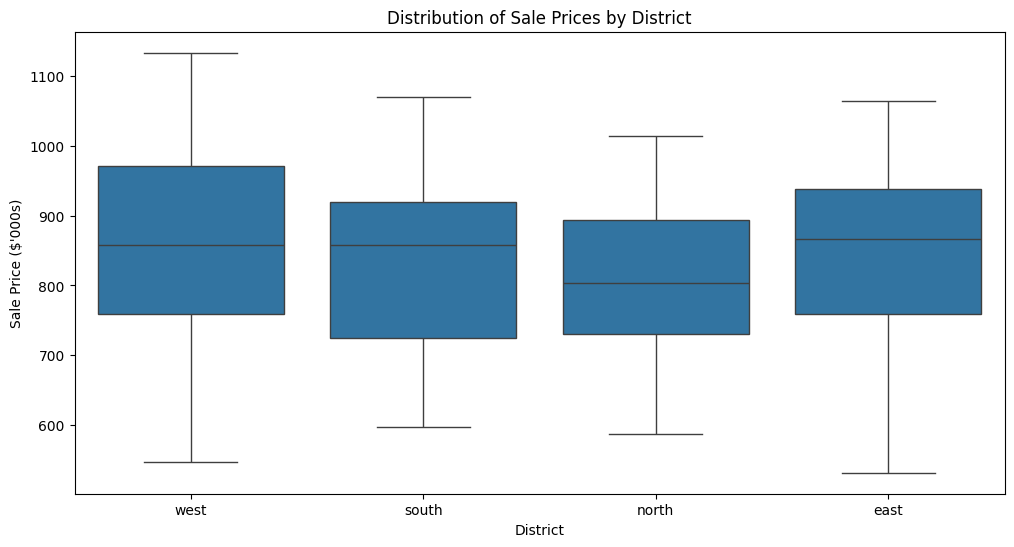

In [ ]:
# Group by district and calculate summary statistics
district_summary = data.groupby('district')['saleprice'].describe()
print(district_summary)

# Boxplot of sale prices by district
plt.figure(figsize=(12, 6))
sns.boxplot(x='district', y='saleprice', data=data)
plt.title('Distribution of Sale Prices by District')
plt.xlabel('District')
plt.ylabel('Sale Price ($\'000s)')
plt.show()


The East district has a moderate range of prices around an average of 841.03k, and the prices ranging from 532k to 1.064 million, indicating a diverse market. The North district has a slightly lower average price of 804.81k with a less variability. The South district has a higher median price, with more higher-priced homes within its 44 listings. The West district has the highest average sale price of 860.87k and the greatest price variability.

##Is there a relationship between the number of bedrooms and the sale price?

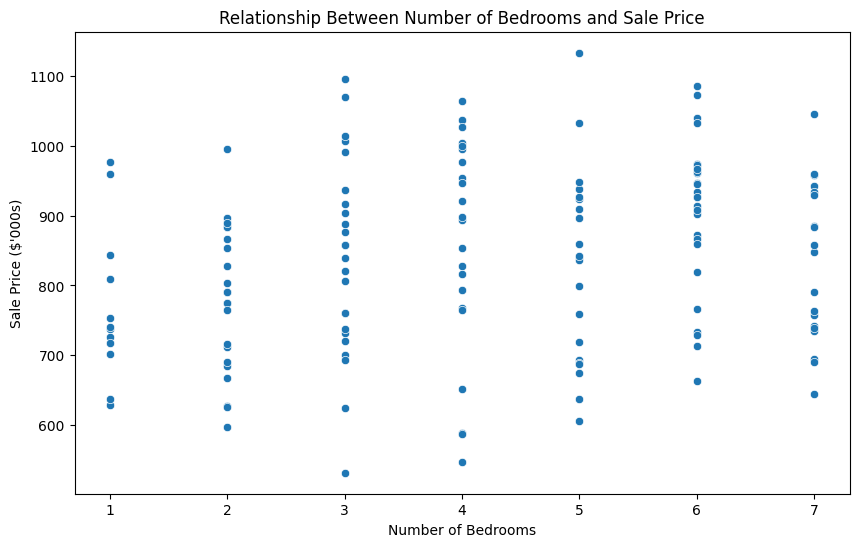

Correlation coefficient between number of bedrooms and sale price: 0.21


In [ ]:
# Plotting the relationship between number of bedrooms and sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numbedrooms', y='saleprice', data=data)
plt.title('Relationship Between Number of Bedrooms and Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

# Calculating correlation coefficient
correlation = data['numbedrooms'].corr(data['saleprice'])
print(f"Correlation coefficient between number of bedrooms and sale price: {correlation:,.2}")


With a coorelation coefficient of 0.21. There is not a signficant relationship between the number of bedrooms and the sale price.

##How do the square footage and sale price correlate?

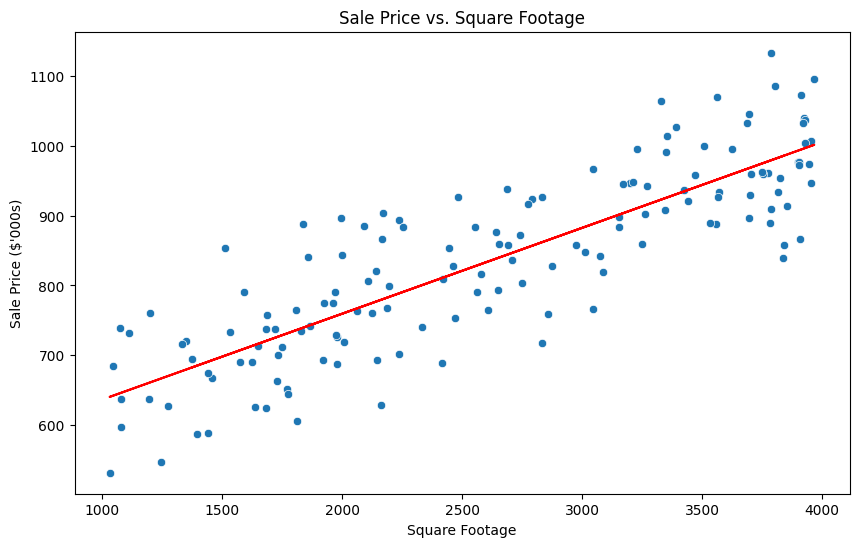

Correlation coefficient between square footage and sale price: 0.85
Slope: 0.12285243861254021
Intercept: 513.8937102283439


In [ ]:
slope, intercept = np.polyfit(data['sqft'], data['saleprice'], 1)

# Plotting square footage against sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y = 'saleprice', data=data)
plt.plot(data['sqft'], slope*data['sqft'] + intercept, color='red', label='Regression Line')
plt.title('Sale Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

# Calculating correlation coefficient
correlation_sqft_saleprice = data['sqft'].corr(data['saleprice'])
print(f"Correlation coefficient between square footage and sale price: {correlation_sqft_saleprice:,.2}")

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

With a correlation coefficient of 0.85. There is a coorelation between the square footage and the sale price. Where properties with more square footage have a higher sales price. Additionally, with an intercept of 513.9, this tells us that the expected sales price of land, or when the square footage is 0 is $$513,893. And, on average, the sale price increases by $123 by each extra square foot.

##Are there any outliers in the data? NaNs?

zipcode         0
district        0
sqft            0
numbedrooms     0
numbathrooms    0
floors          0
view            0
saleprice       0
askingprice     0
dtype: int64
            zipcode         sqft  numbedrooms  numbathrooms      floors  \
count    148.000000   148.000000   148.000000    148.000000  148.000000   
mean   95146.270270  2627.175676     4.148649      1.925676    1.925676   
std     2455.332846   898.555642     1.882121      0.707984    0.800435   
min    91312.000000  1031.000000     1.000000      1.000000    1.000000   
25%    94555.000000  1850.750000     3.000000      1.500000    1.000000   
50%    95141.000000  2624.000000     4.000000      2.000000    2.000000   
75%    96334.000000  3478.250000     6.000000      2.500000    3.000000   
max    98755.000000  3967.000000     7.000000      3.000000    3.000000   

         saleprice  askingprice  
count   148.000000   148.000000  
mean    836.648649   840.500000  
std     130.518842   131.143194  
min     532.0

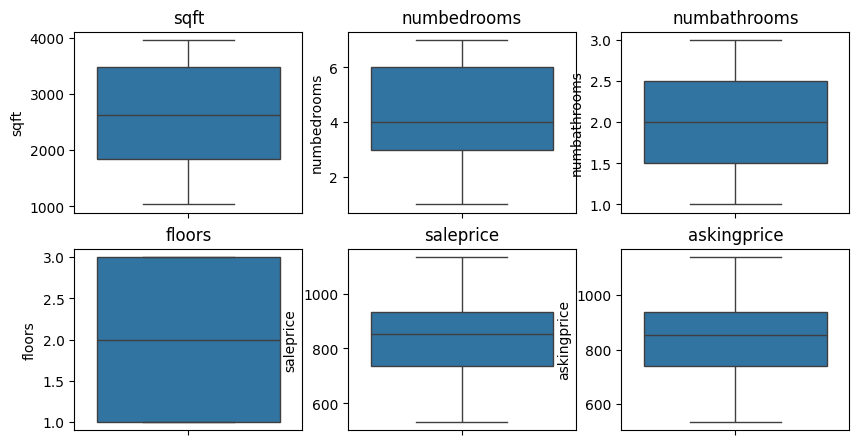

In [ ]:
# Check for NaN values
nans = data.isna().sum()
print(nans)

# statistics
print(data.describe())


# create boxplots for all numeric columns
plt.figure(figsize=(10, 8))
columns_to_check = ['sqft', 'numbedrooms', 'numbathrooms', 'floors', 'saleprice', 'askingprice']

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.show()


There are no NANs. There doesn't appear to be any outliers. But, there are points above the upper limits for the sale and asking prices. Hoowver, they could just be properties with a price above the typical range and not an outlier.

##Do properties with a view generally have higher sale prices?

view
False    810.875000
True     866.970588
Name: saleprice, dtype: float64
The price with a view is an average of $56k higher than without a view.


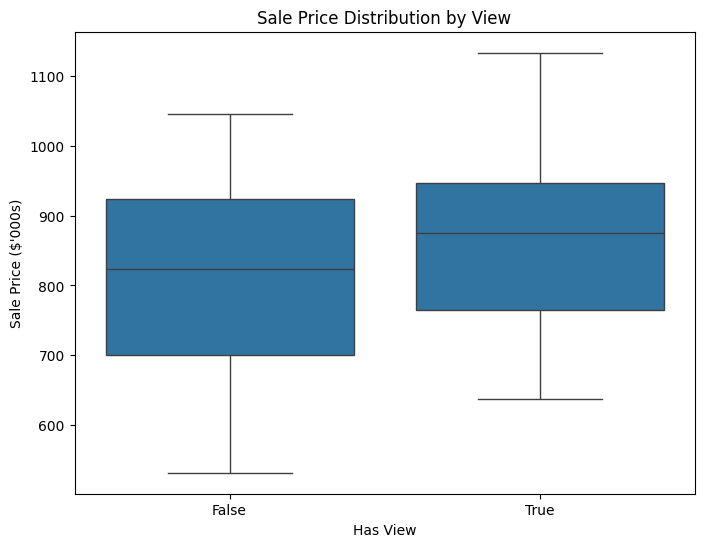

In [ ]:
# Comparing average sale prices of properties with and without a view
view_sale_price = data.groupby('view')['saleprice'].mean()
print(view_sale_price)
price_difference = view_sale_price[True] - view_sale_price[False]
print(f"The price with a view is an average of ${price_difference:,.0f}k higher than without a view.")

# Boxplot to visualize the comparison.
plt.figure(figsize=(8, 6))
sns.boxplot(x='view', y='saleprice', data=data)
plt.title('Sale Price Distribution by View')
plt.xlabel('Has View')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

##How many properties are in each district?

In [ ]:
# Count of properties in each district
properties_per_district = data['district'].value_counts()

#print results
print(properties_per_district)

district
south    44
west     39
east     33
north    32
Name: count, dtype: int64


The south district has 44 properties, the west has 39, the east has 33, and the north district has 32 properties.

##Histogram of Sale Prices

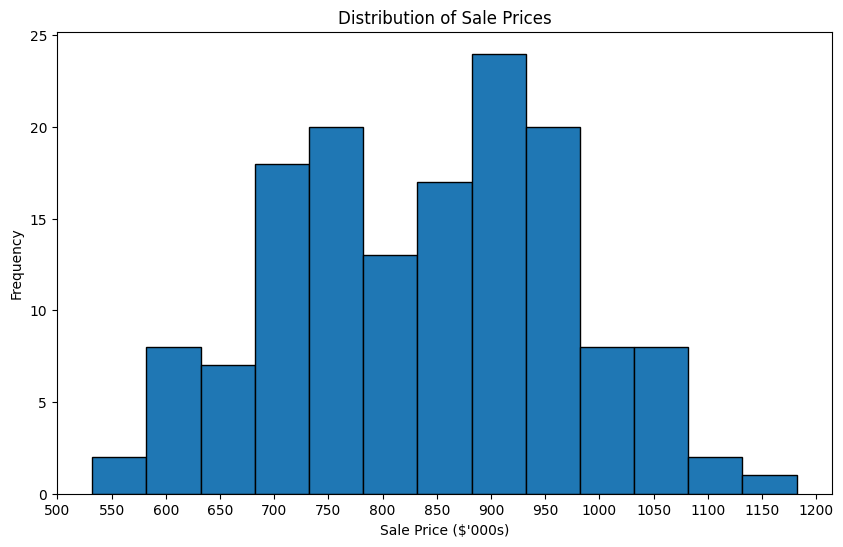

In [ ]:
# Create bin edges
bin_edges = np.arange(data['saleprice'].min(), data['saleprice'].max() + 50, 50)

# Plot histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(data['saleprice'], bins=bin_edges, edgecolor='black')
plt.xticks(np.arange(500, 1201, 50))
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($\'000s)')
plt.ylabel('Frequency')
plt.show()